# 初步观察数据
training set: 9580 rows
test set: 2430 rows

In [1]:
import pandas as pd
import numpy as np
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [3]:
%matplotlib inline

In [2]:
param_training = pd.read_csv('training/zhongzhi_param_data_train.csv')
# use pd.read_table() to read from tab-separated files.
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html


draft_training = pd.read_csv('training/zhongzhi_draft_data_train.csv')
# use pd.read_table() to read from tab-separated files.
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html

param_test = pd.read_csv('test/zhongzhi_param_data_test.csv')
# use pd.read_table() to read from tab-separated files.
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html


draft_test = pd.read_csv('test/zhongzhi_draft_data_test.csv')

In [3]:
training_set = pd.merge(draft_training, param_training, on=['product_no'])

test_set = pd.merge(draft_test, param_test, on=['product_no'])

In [4]:
training_set.loc[:,'y'] = np.log10(1.001 - training_set.key_index_x)

In [33]:
training_set.to_csv('training_set_all.csv', index=False)

In [5]:
from sklearn.cross_validation import train_test_split

training_set, cv_set = train_test_split(training_set, test_size = 0.4)
# split training and cv set

In [6]:
training_set.shape, cv_set.shape

((8805, 23), (5870, 23))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fc3da90>]], dtype=object)

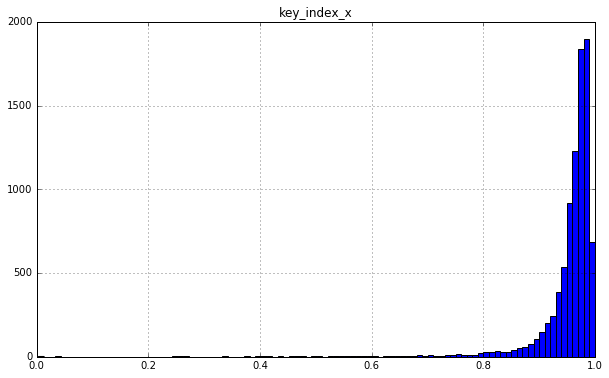

In [8]:
training_set.hist(column=['key_index_x'],bins=100)

# 明显偏差的数据分布, 可能需要整理

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fe18278>]], dtype=object)

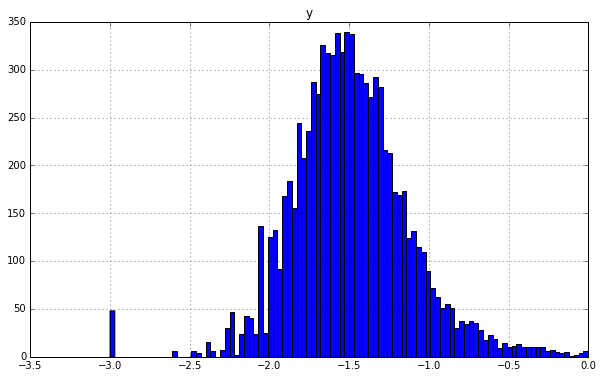

In [9]:
training_set.hist(column=['y'],bins=100)

In [40]:
training_set.describe()

/Users/mofrankhu/.pyenv/versions/3.5.1/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,product_no,key_index_x,draft_param1,draft_param2,draft_param3,draft_param4,draft_param5,draft_param6,draft_param7,draft_param9,...,param1,param2,param3,param4,param5,param6,param7,param8,param9,y
count,8805.000000,8805.000000,8805.000000,8805.000000,8805.000000,8805.000000,8805.000000,8805.000000,8805.000000,8805.000000,...,8805.000000,8805.000000,8802.000000,8798.000000,8805.000000,8805.000000,8805.000000,8805.000000,8805.000000,8805.000000
mean,9315.231459,0.952828,3.678705,0.048495,0.402839,342.937649,0.088026,0.939489,1.124827,0.311497,...,23.014399,22.987844,0.003067,0.113776,4.639637,23.959682,0.028620,2.196139,3.300727,-1.495010
std,5411.364609,0.068616,1.052790,0.214822,0.490497,0.241806,0.061539,0.180690,0.114883,0.099780,...,7.078076,7.088926,0.057321,0.317557,0.932865,21.445446,0.166746,1.640659,0.245957,0.367732
min,3.000000,0.003410,0.000000,0.000000,0.000000,342.000000,0.060000,0.400000,1.000000,0.000000,...,5.600000,5.600000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,3.000000,-3.000000
25%,4618.000000,0.949590,3.000000,0.000000,0.000000,343.000000,0.065000,1.000000,1.050000,0.340000,...,21.400000,21.300000,NaN,NaN,4.000000,8.000000,0.000000,1.000000,3.100000,-1.724458
50%,9307.000000,0.970210,3.000000,0.000000,0.000000,343.000000,0.065000,1.000000,1.050000,0.340000,...,22.000000,22.000000,NaN,NaN,4.000000,17.000000,0.000000,3.000000,3.100000,-1.511590
75%,14041.000000,0.982140,5.000000,0.000000,1.000000,343.000000,0.075000,1.000000,1.300000,0.350000,...,29.300000,29.300000,NaN,NaN,6.000000,34.000000,0.000000,4.000000,3.600000,-1.288952
max,18673.000000,1.000000,5.000000,1.000000,1.000000,343.000000,0.295000,1.000000,1.300000,0.350000,...,30.500000,30.500000,2.000000,1.000000,6.000000,113.000000,1.000000,5.000000,3.600000,-0.001048


In [41]:
result = training_set.iloc[:,[2,3,4]].apply(pd.value_counts).fillna(0); 
result.sort_index()

,draft_param1,draft_param2,draft_param3
0,25,8378.0,5258.0
1,239,427.0,3547.0
2,35,0.0,0.0
3,4959,0.0,0.0
4,530,0.0,0.0
5,3017,0.0,0.0


In [42]:
training_set.sort_values(by=['y','param1'])

,product_no,key_index_x,draft_param1,draft_param2,draft_param3,draft_param4,draft_param5,draft_param6,draft_param7,draft_param9,...,param1,param2,param3,param4,param5,param6,param7,param8,param9,y
9645,12233,1.00000,5,0,1,343,0.280,0.4,1.05,0.00,...,6.400,6.400,0.0,0.0,6,26,0,3,3.6,-3.000000
10325,13117,1.00000,5,0,1,343,0.280,0.4,1.05,0.00,...,6.800,6.800,0.0,0.0,6,19,0,3,3.6,-3.000000
11604,14758,1.00000,5,0,1,343,0.075,1.0,1.30,0.35,...,6.950,6.950,0.0,1.0,6,32,0,0,3.6,-3.000000
11588,14738,1.00000,5,0,1,343,0.075,1.0,1.30,0.35,...,7.293,7.293,0.0,1.0,6,31,0,0,3.6,-3.000000
10660,13555,1.00000,3,0,0,343,0.065,1.0,1.05,0.34,...,7.300,7.300,0.0,1.0,6,59,0,0,3.1,-3.000000
7877,10004,1.00000,3,0,0,343,0.065,1.0,1.05,0.34,...,7.300,7.300,0.0,0.0,6,4,0,3,3.1,-3.000000
9049,11492,1.00000,3,0,0,343,0.065,1.0,1.05,0.34,...,7.400,7.400,0.0,0.0,6,5,0,0,3.1,-3.000000
2132,6387,1.00000,5,0,1,343,0.065,1.0,1.05,0.34,...,7.500,7.500,0.0,0.0,6,23,0,3,3.6,-3.000000
8634,10967,1.00000,3,0,0,343,0.065,1.0,1.05,0.34,...,7.600,7.600,0.0,0.0,6,8,0,0,3.1,-3.000000
7657,9714,1.00000,5,0,1,343,0.075,1.0,1.30,0.35,...,7.600,7.600,0.0,0.0,6,18,0,3,3.6,-3.000000


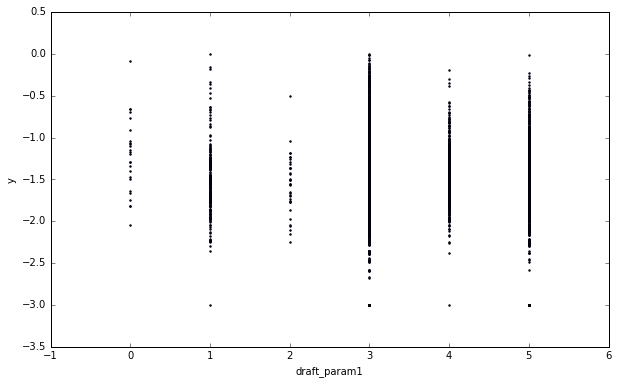

In [54]:
training_set.plot.scatter('draft_param1', 'y', s=2)



In [79]:
bins = [ -3.001+i*0.10 for i in range(31)]
print(round(-2.924,1))
def y_bin(num):
    return round(num, 1)
training_set['y_bin'] = training_set.y.apply(y_bin)


-2.9


/Users/mofrankhu/.pyenv/versions/3.5.1/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [86]:
grouped = training_set.groupby([training_set.draft_param1, 
                                training_set.y_bin])
grouped.count()

product_no  key_index_x  draft_param2  draft_param3  \
draft_param1 y_bin                                                        
0            -2.0            1            1             1             1   
             -1.8            3            3             3             3   
             -1.7            1            1             1             1   
             -1.6            1            1             1             1   
             -1.5            2            2             2             2   
             -1.4            1            1             1             1   
             -1.3            3            3             3             3   
             -1.2            2            2             2             2   
             -1.1            4            4             4             4   
             -1.0            1            1             1             1   
             -0.9            1            1             1             1   
             -0.8            1            1             1             1   
             -0.7            3            3             3             3   
             -0.1            1            1             1             1   
1            -3.0            1            1             1             1   
             -2.4            1            1             1             1   
             -2.3            1            1             1             1   
             -2.2            8            8             8             8   
             -2.1            4            4             4             4   
             -2.0           10           10            10            10   
             -1.9           15           15            15            15   
             -1.8           23           23            23            23   
             -1.7           36           36            36            36   
             -1.6           22           22            22            22   
             -1.5           28           28            28            28   
             -1.4           17           17            17            17   
             -1.3           31           31            31            31   
             -1.2           12           12            12            12   
             -1.1            8            8             8             8   
             -1.0            3            3             3             3   
...                        ...          ...           ...           ...   
4            -0.4            1            1             1             1   
             -0.3            2            2             2             2   
             -0.2            1            1             1             1   
5            -3.0           18           18            18            18   
             -2.6            1            1             1             1   
             -2.5            2            2             2             2   
             -2.4            5            5             5             5   
             -2.3           14           14            14            14   
             -2.2           16           16            16            16   
             -2.1           36           36            36            36   
             -2.0           83           83            83            83   
             -1.9          126          126           126           126   
             -1.8          209          209           209           209   
             -1.7          352          352           352           352   
             -1.6          408          408           408           408   
             -1.5          427          427           427           427   
             -1.4          394          394           394           394   
             -1.3          335          335           335           335   
             -1.2          225          225           225           225   
             -1.1          144          144           144           144   
             -1.0           97           97  

In [89]:
heatmap = pd.crosstab(training_set.draft_param1, training_set.y_bin, 
                      rownames=['draft_param1'], colnames=['y'])

/Users/mofrankhu/.pyenv/versions/3.5.1/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


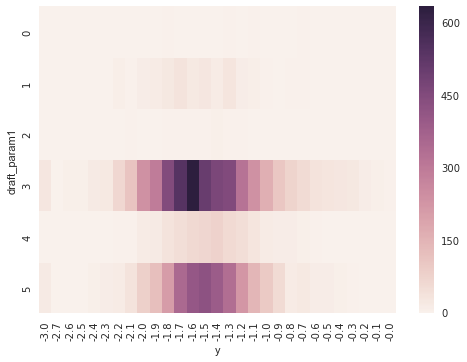

In [90]:
import seaborn as sns; sns.set()
ax = sns.heatmap(heatmap)

In [74]:
out = pd.cut(training_set.y, bins=bins, include_lowest=True)
counts = pd.value_counts(out)
# counts is a Series
counts.reindex(out.cat.categories)

[-3.001, -2.901]      48
(-2.901, -2.801]       0
(-2.801, -2.701]       0
(-2.701, -2.601]       2
(-2.601, -2.501]       6
(-2.501, -2.401]      12
(-2.401, -2.301]      23
(-2.301, -2.201]      96
(-2.201, -2.101]     118
(-2.101, -2.001]     206
(-2.001, -1.901]     416
(-1.901, -1.801]     605
(-1.801, -1.701]     853
(-1.701, -1.601]    1064
(-1.601, -1.501]    1096
(-1.501, -1.401]    1029
(-1.401, -1.301]     922
(-1.301, -1.201]     723
(-1.201, -1.101]     533
(-1.101, -1.001]     355
(-1.001, -0.901]     220
(-0.901, -0.801]     137
(-0.801, -0.701]     103
(-0.701, -0.601]      74
(-0.601, -0.501]      48
(-0.501, -0.401]      37
(-0.401, -0.301]      31
(-0.301, -0.201]      25
(-0.201, -0.101]      14
(-0.101, -0.001]       9
Name: y, dtype: int64

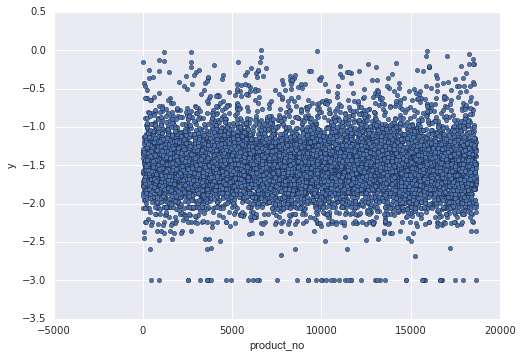

In [95]:
for param in training_set.columns:
    training_set.plot.scatter(param, 'y')
    break
# scatter 因为点太多, 效果不好

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10cb76eb8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10db9d1d0>]], dtype=object)

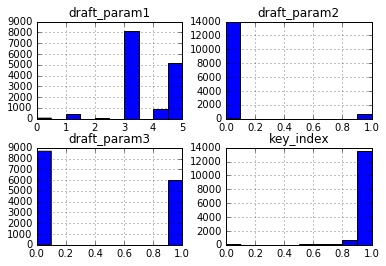

In [8]:
draft_training.hist(column=['key_index','draft_param1','draft_param2','draft_param3'],bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112d435c0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x112fa1160>]], dtype=object)

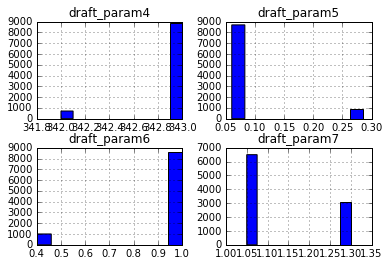

In [14]:
draft_data.hist(column=['draft_param4','draft_param5','draft_param6','draft_param7'],bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1130caf28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113221d30>]], dtype=object)

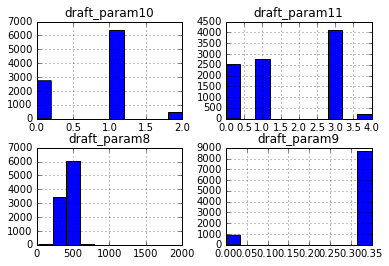

In [15]:
draft_data.hist(column=['draft_param8','draft_param9','draft_param10','draft_param11'],bins=10)

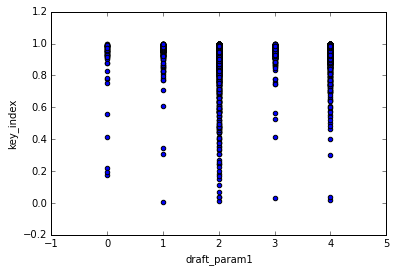

In [17]:
draft_data.plot.scatter('draft_param1', 'key_index')

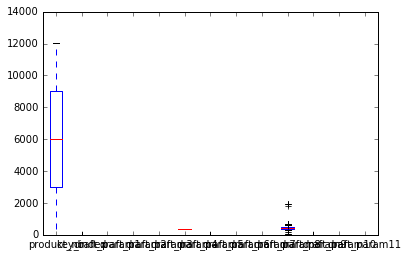

In [20]:
draft_data.plot.box(by='product_no')

In [21]:
import seaborn as sns

/Users/mofrankhu/.pyenv/versions/3.5.1/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


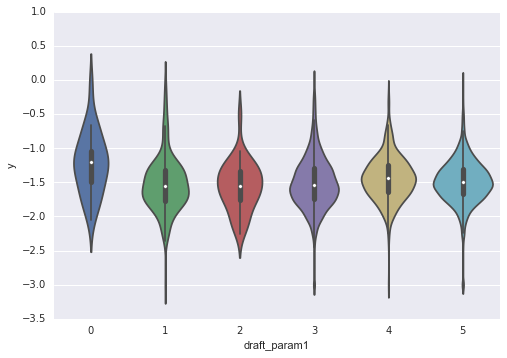

In [100]:
sns.violinplot(x="draft_param1", y="y",
                 data=training_set)

In [109]:
grouped = training_set.groupby('draft_param1')
# grouped.aggregate(np.mean)
print(grouped.y.agg([np.count_nonzero, np.mean, np.std]))

              count_nonzero      mean       std
draft_param1                                   
0                      25.0 -1.223018  0.448874
1                     239.0 -1.518699  0.410279
2                      35.0 -1.557707  0.357107
3                    4959.0 -1.504268  0.393509
4                     530.0 -1.438326  0.325457
5                    3017.0 -1.489401  0.322244


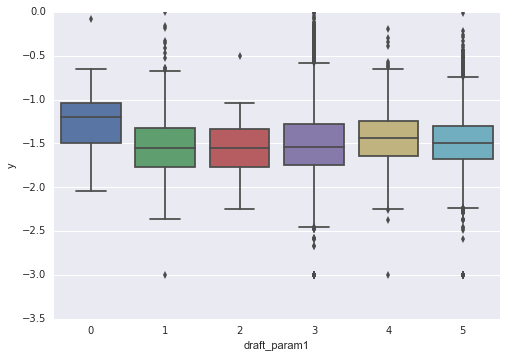

In [108]:
sns.boxplot(x="draft_param1", y="y",
                 data=training_set)

        count_nonzero      mean       std
param8                                   
0              1895.0 -1.564217  0.353631
1              1947.0 -1.455031  0.392915
2               511.0 -1.427405  0.382396
3              1951.0 -1.555754  0.344816
4              1990.0 -1.444013  0.359867
5               511.0 -1.424977  0.342548


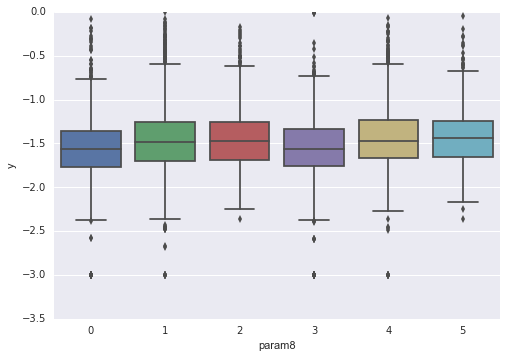

In [124]:
param = 'param8'
#sns.violinplot(x=param, y="y",
#                 data=training_set)
grouped = training_set.groupby(param)
# grouped.aggregate(np.mean)
print(grouped.y.agg([np.count_nonzero, np.mean, np.std]))
plot = sns.boxplot(x=param, y="y",
                 data=training_set)
plot.figure.savefig(param+".png")

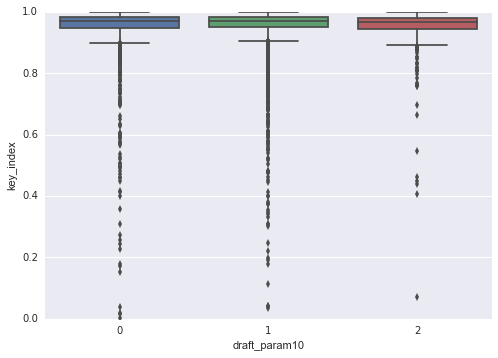

In [29]:
sns.boxplot(x="draft_param10", y="key_index",
                 data=draft_data)


In [28]:
draft_data.sort_values(by='key_index')

,product_no,key_index,draft_param1,draft_param2,draft_param3,draft_param4,draft_param5,draft_param6,draft_param7,draft_param8,draft_param9,draft_param10,draft_param11
637,5286,0.00341,1,0,0,343,0.065,1.0,1.05,432,0.34,0,0
6111,10385,0.01508,2,0,0,343,0.065,1.0,1.05,399,0.34,0,0
6187,10911,0.02028,4,0,1,343,0.075,1.0,1.30,578,0.35,0,3
8394,3637,0.03426,3,1,1,343,0.075,1.0,1.30,545,0.35,1,3
8026,1175,0.03894,4,0,1,343,0.075,1.0,1.30,581,0.35,0,3
7417,8172,0.04004,2,0,0,343,0.065,1.0,1.05,401,0.34,1,1
8252,2705,0.04075,2,0,0,343,0.065,1.0,1.05,399,0.34,1,1
5261,4287,0.07165,2,0,0,343,0.065,1.0,1.05,486,0.34,2,1
4595,11755,0.11286,2,0,0,343,0.065,1.0,1.05,442,0.34,1,1
4503,11023,0.15189,2,0,0,343,0.065,1.0,1.05,425,0.34,0,1


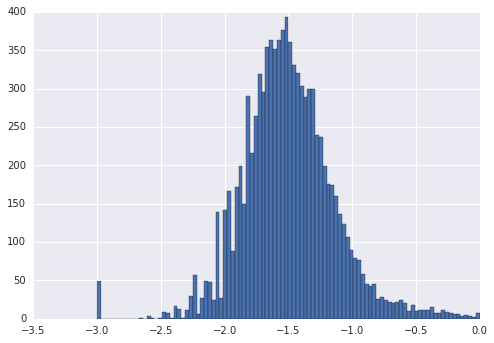

In [41]:
np.log10(1.001 - draft_data.key_index).hist(bins=100)

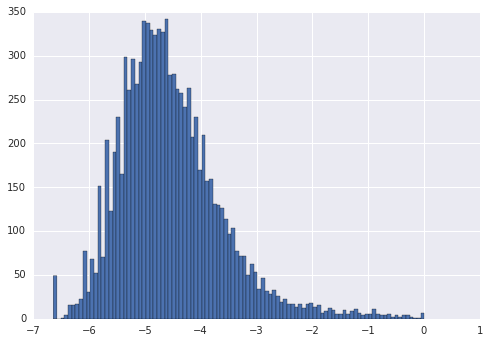

In [37]:
np.log2(1.01 - draft_data.key_index).hist(bins=100)

In [10]:
top50 = training_set.sort_values(by='y').iloc[:50,:]

In [11]:
least50 = training_set.sort_values(by='y').iloc[-50:,:]

In [140]:
least50.describe()

,product_no,key_index_x,draft_param1,draft_param2,draft_param3,draft_param4,draft_param5,draft_param6,draft_param7,draft_param9,...,param2,param3,param4,param5,param6,param7,param8,param9,y,y_bin
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.000000,50.000000,...,50.000000,50.0,50.000000,50.000000,50.000000,50.000000,50.00000,50.00000,50.000000,50.000000
mean,9608.600000,0.344817,3.020000,0.020000,0.120000,342.920000,0.066200,1.0,1.080000,0.341200,...,26.842500,0.0,0.020000,4.520000,14.420000,0.080000,2.00000,3.15800,-0.192457,-0.202000
std,6102.544277,0.145790,0.891914,0.141421,0.328261,0.274048,0.003283,0.0,0.082065,0.003283,...,5.161675,0.0,0.141421,0.886175,17.443893,0.274048,1.59079,0.16548,0.089475,0.097917
min,25.000000,0.003410,0.000000,0.000000,0.000000,342.000000,0.065000,1.0,1.050000,0.340000,...,7.700000,0.0,0.000000,4.000000,1.000000,0.000000,0.00000,3.00000,-0.304256,-0.300000
25%,4336.250000,0.294475,3.000000,0.000000,0.000000,343.000000,0.065000,1.0,1.050000,0.340000,...,28.500000,0.0,0.000000,4.000000,4.000000,0.000000,1.00000,3.10000,-0.269276,-0.300000
50%,9589.000000,0.387355,3.000000,0.000000,0.000000,343.000000,0.065000,1.0,1.050000,0.340000,...,29.300000,0.0,0.000000,4.000000,8.000000,0.000000,1.00000,3.10000,-0.212179,-0.200000
75%,15829.500000,0.463073,3.000000,0.000000,0.000000,343.000000,0.065000,1.0,1.050000,0.340000,...,29.500000,0.0,0.000000,5.500000,20.750000,0.000000,3.75000,3.10000,-0.150897,-0.125000
max,18533.000000,0.504700,5.000000,1.000000,1.000000,343.000000,0.075000,1.0,1.300000,0.350000,...,30.000000,0.0,1.000000,6.000000,94.000000,1.000000,5.00000,3.60000,-0.001048,-0.000000


In [141]:
top50.describe()

,product_no,key_index_x,draft_param1,draft_param2,draft_param3,draft_param4,draft_param5,draft_param6,draft_param7,draft_param9,...,param2,param3,param4,param5,param6,param7,param8,param9,y,y_bin
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,10268.600000,0.999955,3.700000,0.020000,0.380000,342.980000,0.08070,0.952000,1.115000,0.322400,...,11.223080,0.020000,0.120000,5.800000,19.140000,0.020000,1.740000,3.290000,-2.986866,-2.988000
std,5041.140558,0.000224,1.035098,0.141421,0.490314,0.141421,0.05106,0.164429,0.110772,0.082402,...,5.988274,0.141421,0.328261,0.606092,16.557889,0.141421,1.575449,0.245157,0.065004,0.059385
min,479.000000,0.998850,1.000000,0.000000,0.000000,342.000000,0.06500,0.400000,1.050000,0.000000,...,6.400000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,3.100000,-3.000000,-3.000000
25%,6228.000000,1.000000,3.000000,0.000000,0.000000,343.000000,0.06500,1.000000,1.050000,0.340000,...,7.612500,0.000000,0.000000,6.000000,7.250000,0.000000,0.000000,3.100000,-3.000000,-3.000000
50%,10639.000000,1.000000,3.000000,0.000000,0.000000,343.000000,0.06500,1.000000,1.050000,0.340000,...,8.087000,0.000000,0.000000,6.000000,14.000000,0.000000,1.000000,3.100000,-3.000000,-3.000000
75%,14753.000000,1.000000,5.000000,0.000000,1.000000,343.000000,0.07500,1.000000,1.237500,0.350000,...,14.075000,0.000000,0.000000,6.000000,22.750000,0.000000,3.000000,3.600000,-3.000000,-3.000000
max,18644.000000,1.000000,5.000000,1.000000,1.000000,343.000000,0.28000,1.000000,1.300000,0.350000,...,30.145000,1.000000,1.000000,6.000000,66.000000,1.000000,4.000000,3.600000,-2.667562,-2.700000


In [12]:
top50_no = top50.product_no.tolist()
least50_no = least50.product_no.tolist()


In [145]:
top50[:5]

,product_no,key_index_x,draft_param1,draft_param2,draft_param3,draft_param4,draft_param5,draft_param6,draft_param7,draft_param9,...,param2,param3,param4,param5,param6,param7,param8,param9,y,y_bin
9167,11638,1.0,3,0,0,343,0.065,1.0,1.05,0.34,...,14.40,0.0,0.0,6,41,0,1,3.1,-3.0,-3.0
12493,931,1.0,3,0,0,343,0.065,1.0,1.05,0.34,...,14.10,0.0,0.0,6,26,0,1,3.1,-3.0,-3.0
11604,14758,1.0,5,0,1,343,0.075,1.0,1.30,0.35,...,6.95,0.0,1.0,6,32,0,0,3.6,-3.0,-3.0
9200,11680,1.0,5,0,1,343,0.075,1.0,1.30,0.35,...,7.80,0.0,0.0,6,22,0,3,3.6,-3.0,-3.0
3576,15705,1.0,3,0,0,343,0.065,1.0,1.05,0.34,...,9.40,0.0,0.0,6,18,0,0,3.1,-3.0,-3.0


In [147]:
top50.to_csv('top50.csv')
least50.to_csv('least50.csv')

In [13]:
print(top50_no)
print(least50_no)

[14738, 15638, 4586, 5885, 3606, 18644, 3415, 7516, 11638, 9714, 6477, 13265, 15705, 4466, 2816, 15740, 11894, 16718, 8739, 4951, 8974, 17509, 9240, 10004, 5206, 13555, 15269, 11728, 12233, 3578, 12582, 181, 10729, 13117, 17917, 13855, 2514, 18336, 10993, 15827, 6612, 13293, 9110, 6530, 7991, 9238, 16889, 931, 12759, 14966]
[11648, 18079, 9362, 11539, 5833, 11356, 3003, 8876, 9305, 15672, 6436, 9425, 6458, 15360, 3169, 10856, 5031, 2058, 6886, 16037, 13074, 10250, 2708, 15999, 13889, 17807, 11023, 885, 18490, 18262, 14182, 2721, 1200, 9129, 13890, 7388, 887, 8913, 15882, 17048, 14703, 18259, 11790, 5054, 2710, 11713, 3885, 9753, 15912, 6636]


In [14]:
training_set.sort_values(by='y')

,product_no,key_index_x,draft_param1,draft_param2,draft_param3,draft_param4,draft_param5,draft_param6,draft_param7,draft_param9,...,param1,param2,param3,param4,param5,param6,param7,param8,param9,y
11588,14738,1.00000,5,0,1,343,0.075,1.0,1.30,0.35,...,7.293,7.293,0.0,1.0,6,31,0,0,3.6,-3.000000
3524,15638,1.00000,5,0,1,343,0.075,1.0,1.30,0.35,...,29.600,29.400,0.0,0.0,4,15,0,1,3.6,-3.000000
696,4586,1.00000,5,0,1,343,0.075,1.0,1.30,0.35,...,7.864,7.764,0.0,0.0,6,15,0,0,3.6,-3.000000
1727,5885,1.00000,3,0,0,343,0.065,1.0,1.05,0.34,...,8.500,8.400,0.0,0.0,6,55,0,0,3.1,-3.000000
14571,3606,1.00000,3,0,0,343,0.065,1.0,1.05,0.34,...,14.300,14.300,0.0,1.0,6,11,0,1,3.1,-3.000000
5872,18644,1.00000,5,0,1,343,0.280,0.4,1.05,0.00,...,7.700,7.700,0.0,0.0,6,3,0,3,3.6,-3.000000
14419,3415,1.00000,3,0,0,343,0.065,1.0,1.05,0.34,...,7.694,7.694,0.0,0.0,6,8,0,3,3.1,-3.000000
5930,7516,1.00000,3,0,0,343,0.065,1.0,1.05,0.34,...,7.800,7.800,0.0,0.0,6,56,0,0,3.1,-3.000000
9167,11638,1.00000,3,0,0,343,0.065,1.0,1.05,0.34,...,14.400,14.400,0.0,0.0,6,41,0,1,3.1,-3.000000
7657,9714,1.00000,5,0,1,343,0.075,1.0,1.30,0.35,...,7.600,7.600,0.0,0.0,6,18,0,3,3.6,-3.000000


In [15]:
middle_50 = training_set.sort_values(by='y').iloc[4400:4450,:]

In [18]:
middle_50_no = middle_50.product_no.tolist()

In [19]:
print(middle_50_no)

[15391, 18175, 4510, 11304, 3371, 15597, 7105, 11440, 13917, 3936, 16927, 6089, 10842, 12992, 10012, 8083, 18292, 7055, 9529, 10169, 4464, 18165, 2740, 11825, 18075, 16681, 7926, 6049, 637, 16410, 122, 9936, 13182, 14706, 11227, 7512, 7944, 1689, 3523, 2642, 3110, 12660, 10099, 15169, 7100, 6347, 6579, 2972, 6814, 12973]
